<a href="https://colab.research.google.com/github/Sruthi1606/IIITH-MNIST/blob/main/MNIST(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1: Train Acc = 62.43%, Val Acc = 87.56%
Epoch 2: Train Acc = 89.85%, Val Acc = 92.94%
Epoch 3: Train Acc = 93.30%, Val Acc = 94.61%
Epoch 4: Train Acc = 94.72%, Val Acc = 95.51%
Epoch 5: Train Acc = 95.54%, Val Acc = 96.37%
Epoch 6: Train Acc = 96.28%, Val Acc = 96.52%
Epoch 7: Train Acc = 96.82%, Val Acc = 96.99%
Epoch 8: Train Acc = 97.26%, Val Acc = 97.51%
Epoch 9: Train Acc = 97.58%, Val Acc = 97.57%
Epoch 10: Train Acc = 97.81%, Val Acc = 97.63%
Epoch 11: Train Acc = 98.07%, Val Acc = 97.81%
Epoch 12: Train Acc = 98.19%, Val Acc = 97.98%
Epoch 13: Train Acc = 98.30%, Val Acc = 98.12%
Epoch 14: Train Acc = 98.46%, Val Acc = 98.25%
Epoch 15: Train Acc = 98.53%, Val Acc = 98.34%
Epoch 16: Train Acc = 98.57%, Val Acc = 98.61%
Epoch 17: Train Acc = 98.63%, Val Acc = 98.56%
Epoch 18: Train Acc = 98.73%, Val Acc = 98.67%
Epoch 19: Train Acc = 98.83%, Val Acc = 98.54%
Epoch 20: Train Acc = 98.90%, Val Acc = 98.61%


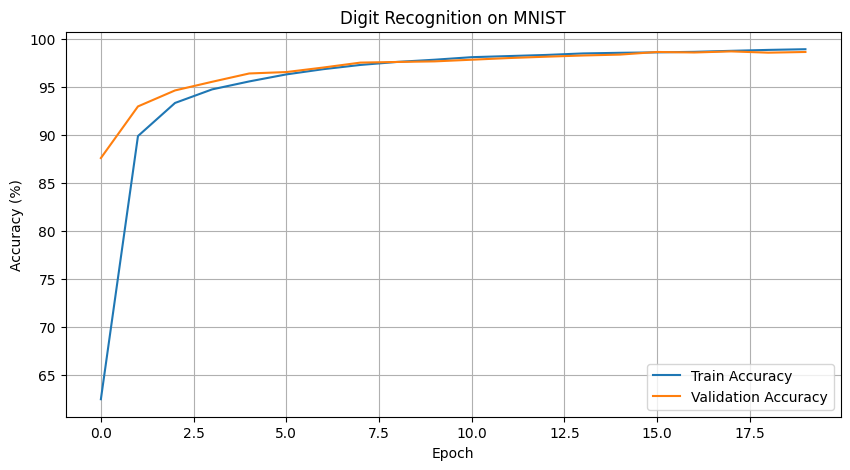


Final Test Accuracy:
Test Accuracy: 98.76%


In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.ToTensor()

full_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, val_data = random_split(full_train, [45000, 15000])

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

class DigitCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

def train_model(model, train_loader, val_loader, epochs=10, lr=0.001, weight_decay=1e-4):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()

    train_acc_list, val_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                correct += (out.argmax(1) == y).sum().item()
                total += y.size(0)
        val_acc = 100 * correct / total
        val_acc_list.append(val_acc)

        print(f"Epoch {epoch+1}: Train Acc = {train_acc:.2f}%, Val Acc = {val_acc:.2f}%")

    return train_acc_list, val_acc_list

def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

model = DigitCNN()
epochs = 20
train_acc, val_acc = train_model(model, train_loader, val_loader, epochs=epochs, lr=0.001, weight_decay=1e-4)

plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Digit Recognition on MNIST')
plt.legend()
plt.grid(True)
plt.show()

print("\nFinal Test Accuracy:")
evaluate(model, test_loader)

OverfitCNN - Epoch 1: Train Acc = 70.70%, Val Acc = 93.65%
OverfitCNN - Epoch 2: Train Acc = 94.78%, Val Acc = 95.81%
OverfitCNN - Epoch 3: Train Acc = 96.79%, Val Acc = 96.28%
OverfitCNN - Epoch 4: Train Acc = 97.40%, Val Acc = 96.81%
OverfitCNN - Epoch 5: Train Acc = 97.69%, Val Acc = 97.04%
OverfitCNN - Epoch 6: Train Acc = 97.55%, Val Acc = 96.98%
OverfitCNN - Epoch 7: Train Acc = 98.33%, Val Acc = 97.46%
OverfitCNN - Epoch 8: Train Acc = 98.26%, Val Acc = 97.52%
OverfitCNN - Epoch 9: Train Acc = 98.46%, Val Acc = 97.56%
OverfitCNN - Epoch 10: Train Acc = 98.51%, Val Acc = 97.29%
OverfitCNN - Epoch 11: Train Acc = 98.83%, Val Acc = 96.29%
OverfitCNN - Epoch 12: Train Acc = 98.51%, Val Acc = 97.60%
OverfitCNN - Epoch 13: Train Acc = 98.99%, Val Acc = 97.44%
OverfitCNN - Epoch 14: Train Acc = 98.87%, Val Acc = 96.70%
OverfitCNN - Epoch 15: Train Acc = 98.96%, Val Acc = 97.36%
OverfitCNN - Epoch 16: Train Acc = 98.63%, Val Acc = 97.45%
OverfitCNN - Epoch 17: Train Acc = 99.05%, Val Ac

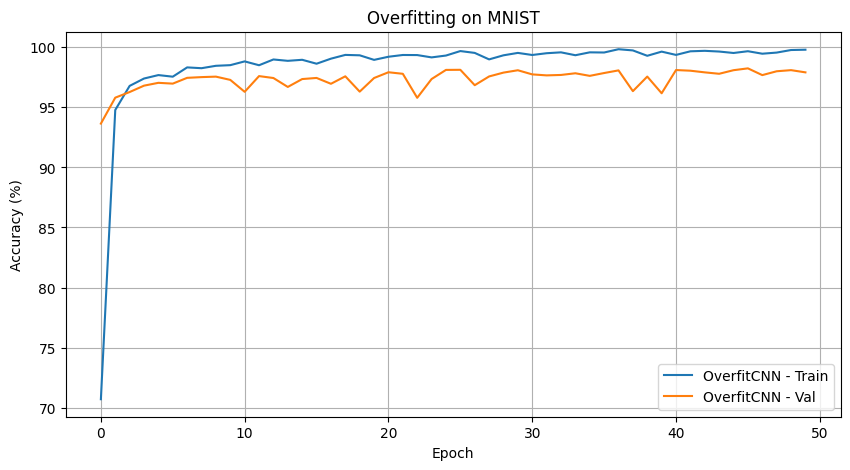


Final Test Accuracy (OverfitCNN):
Test Accuracy: 97.95%


In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.ToTensor()
full_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, val_data = random_split(full_train, [45000,15000])
train_loader = DataLoader(train_data, batch_size=64)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test, batch_size=64)
class OverfitCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=5, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, kernel_size=5, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 512, kernel_size=5, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),

            nn.Flatten(),
            nn.Linear(512 , 2048),
            nn.ReLU(),

            nn.Linear(2048, 1024),
            nn.ReLU(),

            nn.Linear(1024, 10)
        )

    def forward(self, x):
        return self.net(x)

def train_model(model, train_loader, val_loader, epochs=10, title="Model", weight_decay=0.0):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.002, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()

    train_acc_list, val_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                correct += (out.argmax(1) == y).sum().item()
                total += y.size(0)
        val_acc = 100 * correct / total
        val_acc_list.append(val_acc)

        print(f"{title} - Epoch {epoch+1}: Train Acc = {train_acc:.2f}%, Val Acc = {val_acc:.2f}%")

    return train_acc_list, val_acc_list


overfit_model = OverfitCNN()
overfit_train_acc, overfit_val_acc = train_model( overfit_model, train_loader, val_loader, epochs=50, title="OverfitCNN", weight_decay=0.0 )

plt.figure(figsize=(10, 5))
plt.plot(overfit_train_acc, label="OverfitCNN - Train")
plt.plot(overfit_val_acc, label="OverfitCNN - Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Overfitting on MNIST")
plt.legend()
plt.grid(True)
plt.show()


def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")


print("\nFinal Test Accuracy (OverfitCNN):")
evaluate(overfit_model, test_loader)

OvercomeOverfitting  - Epoch 1: Train Acc = 86.31%, Val Acc = 97.71%
OvercomeOverfitting  - Epoch 2: Train Acc = 97.70%, Val Acc = 98.71%
OvercomeOverfitting  - Epoch 3: Train Acc = 98.28%, Val Acc = 98.71%
OvercomeOverfitting  - Epoch 4: Train Acc = 98.50%, Val Acc = 98.59%
OvercomeOverfitting  - Epoch 5: Train Acc = 98.61%, Val Acc = 98.91%
OvercomeOverfitting  - Epoch 6: Train Acc = 98.75%, Val Acc = 98.83%
OvercomeOverfitting  - Epoch 7: Train Acc = 98.77%, Val Acc = 99.02%
OvercomeOverfitting  - Epoch 8: Train Acc = 98.77%, Val Acc = 99.12%
OvercomeOverfitting  - Epoch 9: Train Acc = 98.94%, Val Acc = 99.07%
OvercomeOverfitting  - Epoch 10: Train Acc = 98.94%, Val Acc = 99.03%
OvercomeOverfitting  - Epoch 11: Train Acc = 98.99%, Val Acc = 99.16%
OvercomeOverfitting  - Epoch 12: Train Acc = 98.99%, Val Acc = 99.12%
OvercomeOverfitting  - Epoch 13: Train Acc = 99.00%, Val Acc = 99.13%
OvercomeOverfitting  - Epoch 14: Train Acc = 99.00%, Val Acc = 99.10%
OvercomeOverfitting  - Epoch 

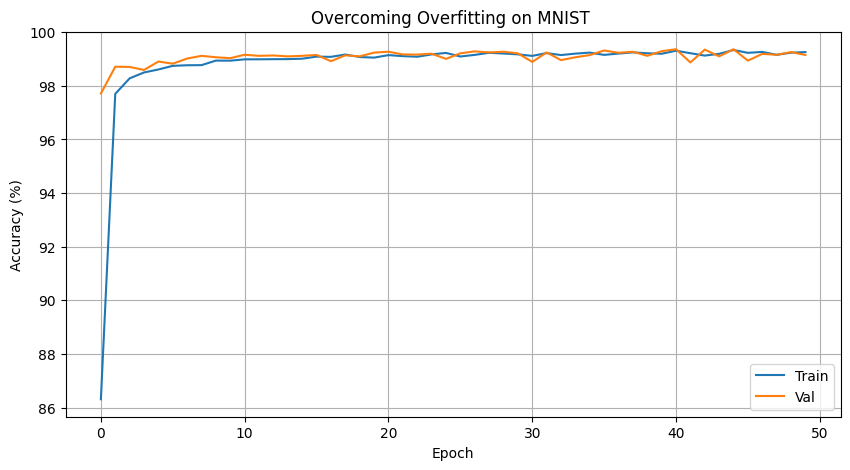


Final Test Accuracy (OvercomeOverfittingCNN on original Test Set):
Test Accuracy: 99.27%


In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.ToTensor()
full_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, val_data = random_split(full_train, [45000, 15000])

train_loader = DataLoader(train_data, batch_size=64)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test, batch_size=64)

class OverfitCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=5, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),

            nn.Conv2d(128, 256, kernel_size=5, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),

            nn.Conv2d(256, 512, kernel_size=5, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Dropout(0.5),

            nn.Linear(512 , 2048),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(1024, 10)
        )

    def forward(self, x):
        return self.net(x)

def train_model(model, train_loader, val_loader, epochs=10, title="Model", weight_decay=0.0):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()

    train_acc_list, val_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                correct += (out.argmax(1) == y).sum().item()
                total += y.size(0)
        val_acc = 100 * correct / total
        val_acc_list.append(val_acc)

        print(f"{title} - Epoch {epoch+1}: Train Acc = {train_acc:.2f}%, Val Acc = {val_acc:.2f}%")

    return train_acc_list, val_acc_list

regularized_model_dropout_l2 = OverfitCNN()

overcome_train_acc, overcome_val_acc = train_model( regularized_model_dropout_l2, train_loader, val_loader, epochs=50, title="OvercomeOverfitting ", weight_decay=0.0005) # L2 Reg

plt.figure(figsize=(10, 5))
plt.plot(overcome_train_acc, label="Train")
plt.plot(overcome_val_acc, label="Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Overcoming Overfitting on MNIST ")
plt.legend()
plt.grid(True)
plt.show()

def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

print("\nFinal Test Accuracy (OvercomeOverfittingCNN on original Test Set):")
evaluate(regularized_model_dropout_l2, test_loader)